In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [3]:
## load the dataset
Data = pd.read_csv('/Users/UzmanAhamed/Documents/Boston_house_price-prediction/BostonHousing (1).csv')
Data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
Data.columns = Data.columns.str.upper()

In [5]:
Data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [6]:
## info iof the dataset
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [7]:
## sumarizing the stats of the dataset
Data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
## Check the missing values
Data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [9]:
Data['RM']

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64

<Axes: >

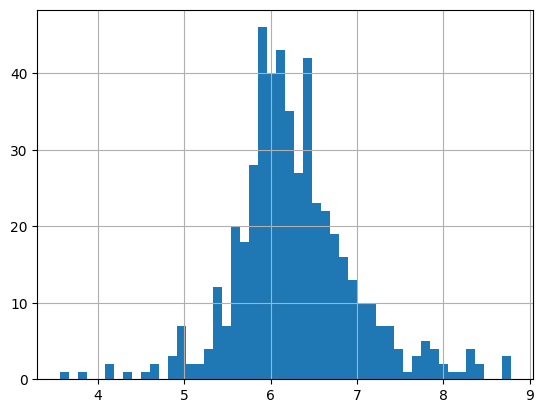

In [10]:
len(Data['RM'].unique())
Data['RM'].hist(bins=50,)

In [11]:
## fill RM feature null value with mean
Data['RM'] = Data['RM'].fillna(Data['RM'].mean())
Data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

# Exploratory Data Analysis

In [12]:
## correlation

Data.corr()['MEDV']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695375
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

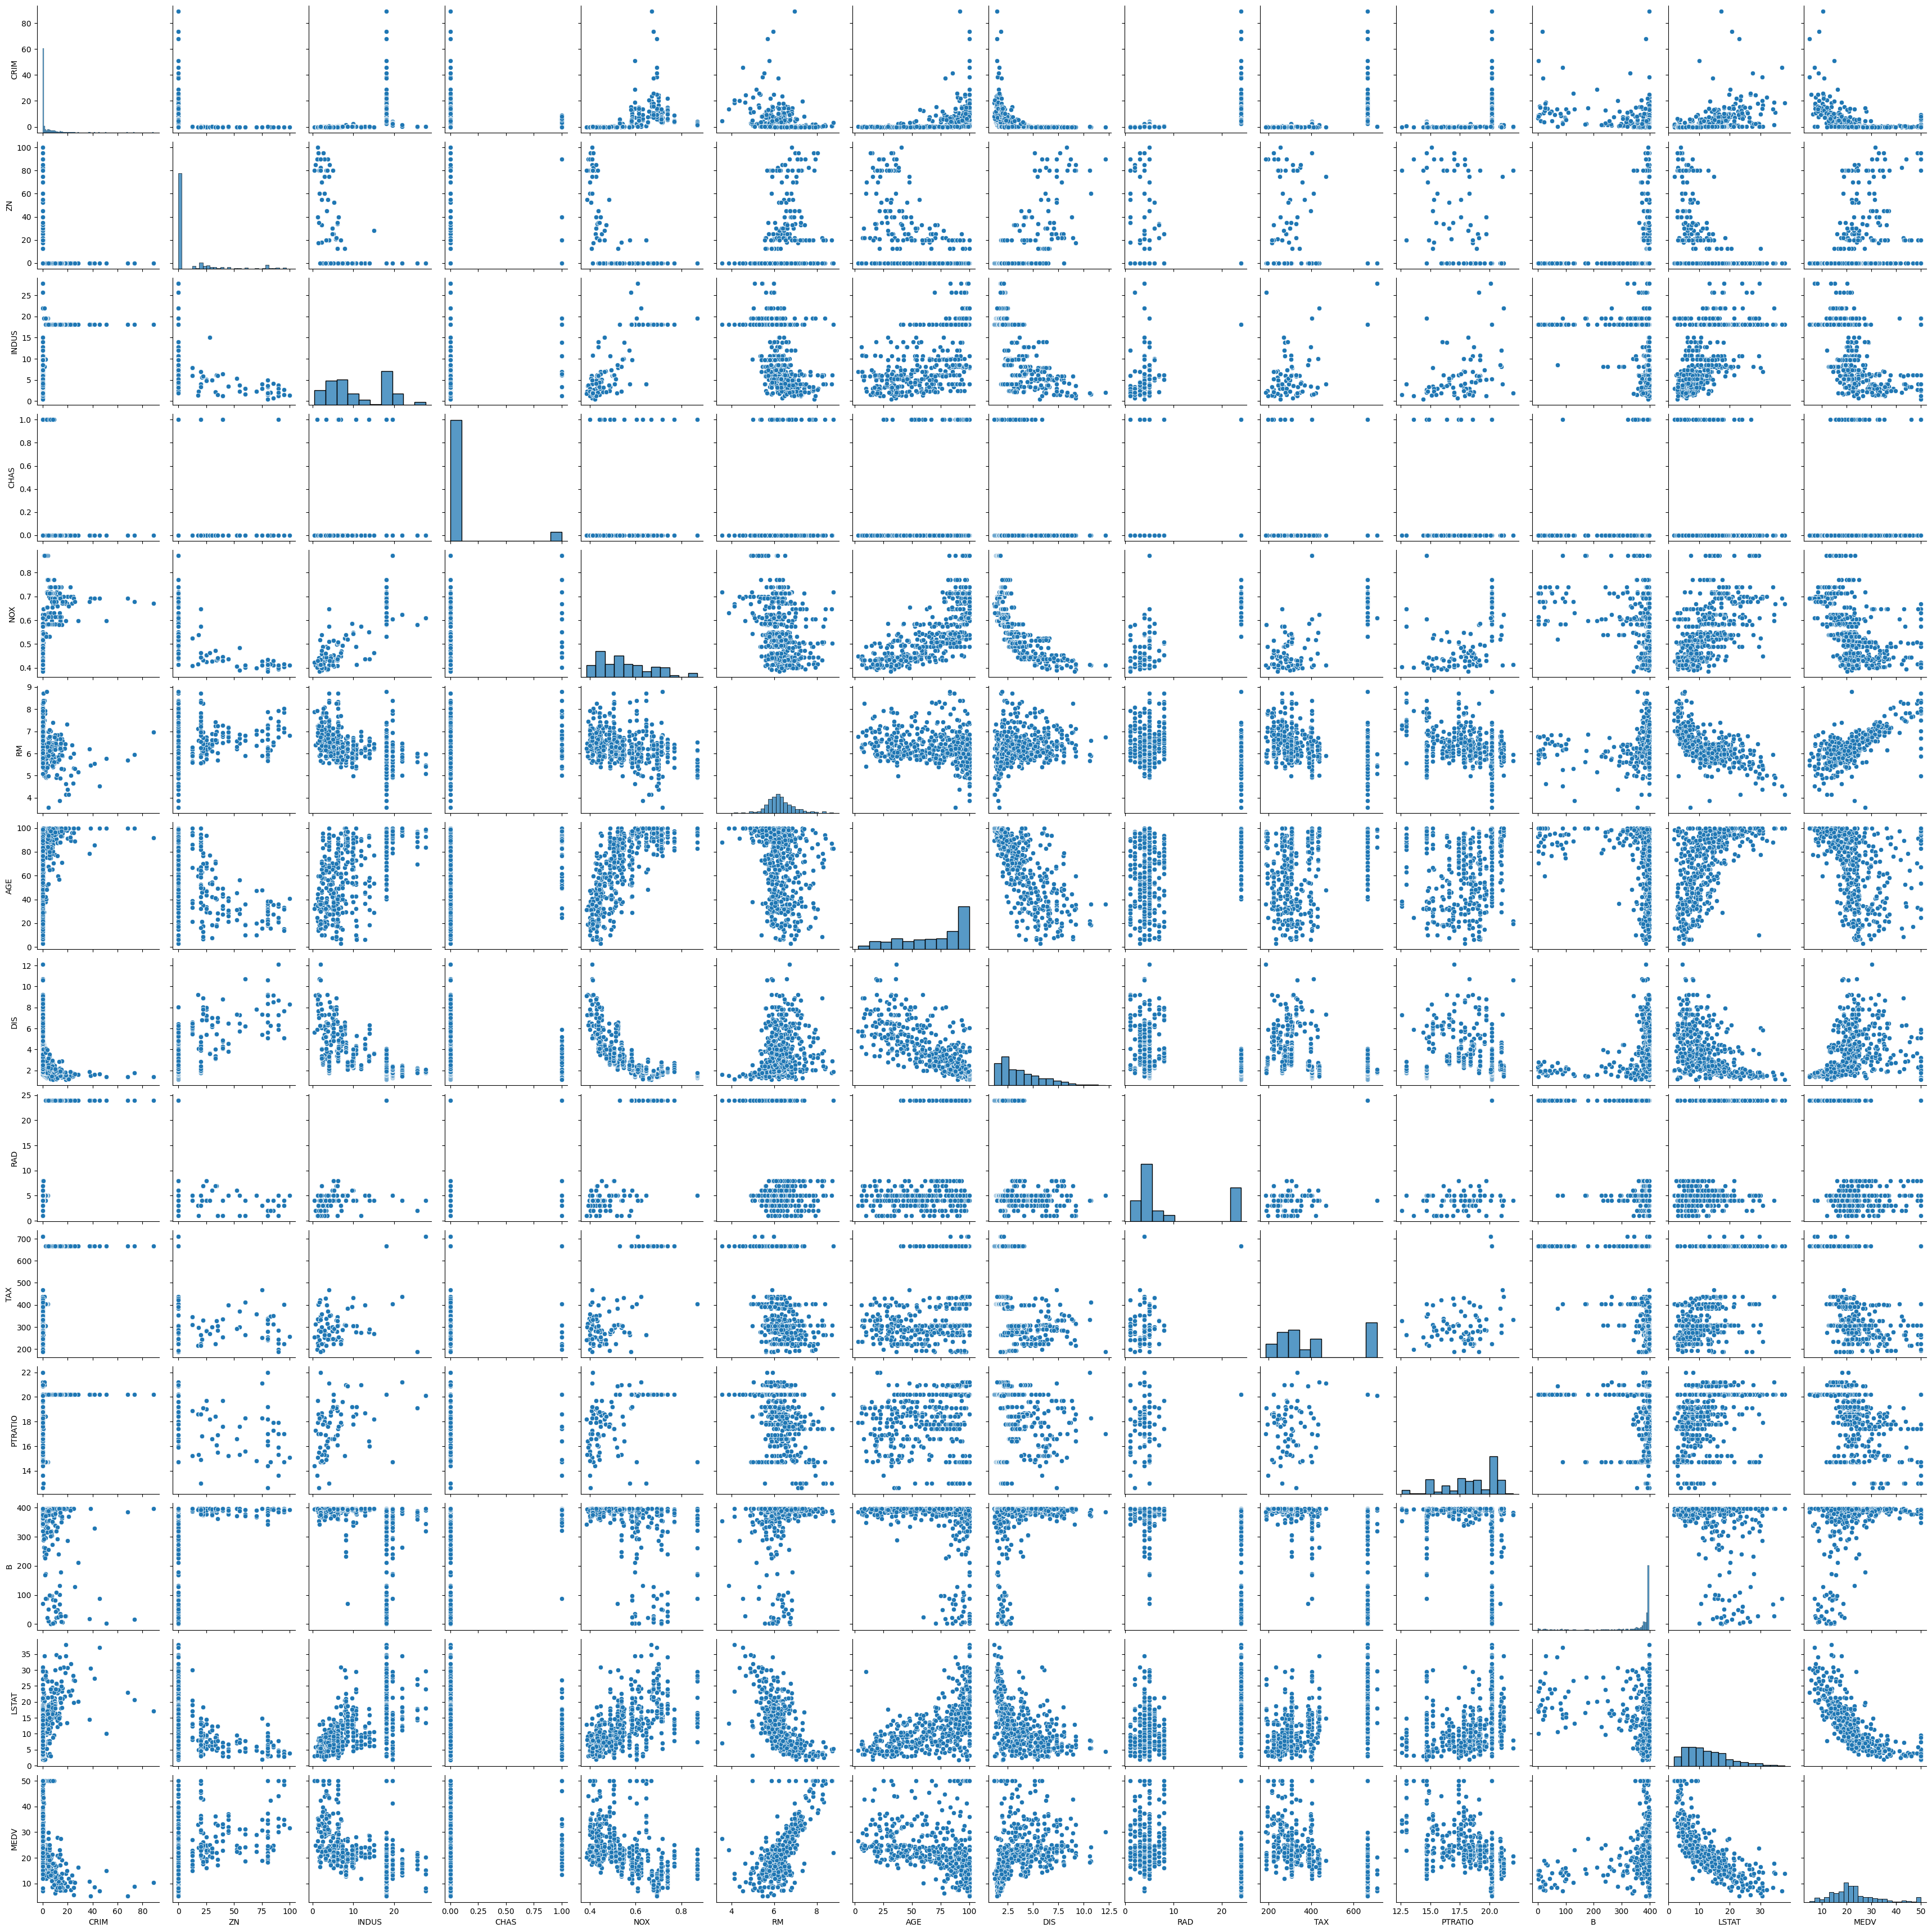

In [13]:
import seaborn as sns
sns.pairplot(Data)

Text(0, 0.5, 'price')

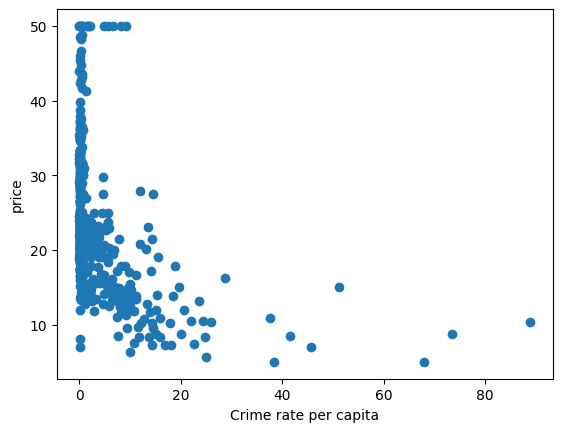

In [14]:
plt.scatter(Data['CRIM'], Data['MEDV'])
plt.xlabel('Crime rate per capita')
plt.ylabel('price')

Text(0, 0.5, 'price')

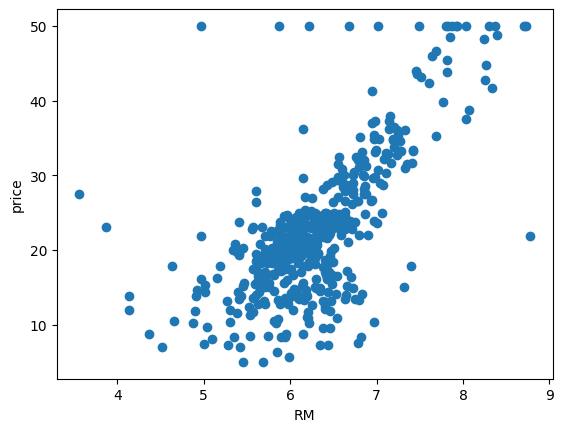

In [15]:
plt.scatter(Data['RM'], Data['MEDV'])
plt.xlabel('RM')
plt.ylabel('price')

<Axes: xlabel='RM', ylabel='MEDV'>

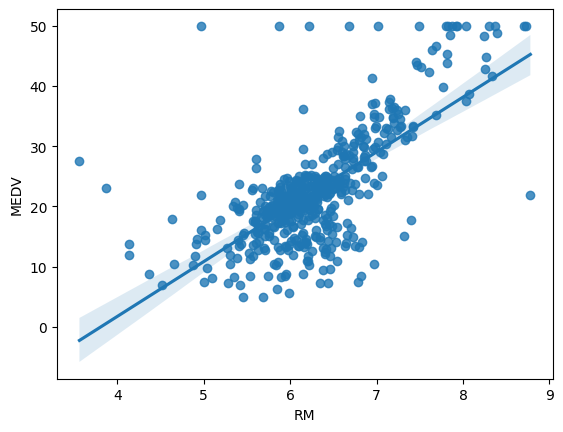

In [16]:
sns.regplot(data= Data, x = 'RM', y = 'MEDV')


<Axes: xlabel='PTRATIO', ylabel='MEDV'>

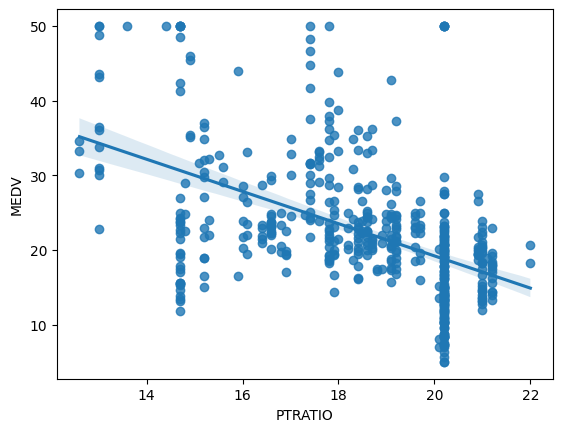

In [17]:
sns.regplot(data= Data, x = 'PTRATIO', y = 'MEDV')

<Axes: xlabel='LSTAT', ylabel='MEDV'>

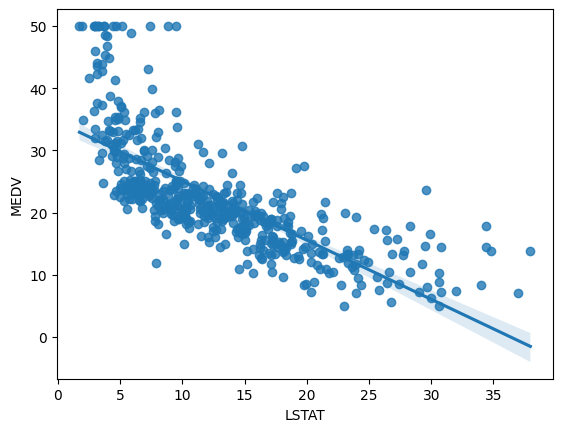

In [18]:
sns.regplot(data= Data, x = 'LSTAT', y = 'MEDV')

In [19]:
## independent and dependent features

X = Data.drop('MEDV', axis=1)
y = Data['MEDV']

In [20]:
## Train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state=42)

In [21]:
## standadize th data set
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
import pickle
pickle.dump(scaler, open('scalling.pkl', 'wb'))

In [23]:
X_train

array([[-0.41425879, -0.50512499, -1.29214218, ...,  0.18727079,
         0.39651419, -1.01531611],
       [-0.40200818, -0.50512499, -0.16208345, ..., -0.21208981,
         0.3870674 , -0.05366252],
       [-0.39721053, -0.50512499, -0.60948856, ..., -0.16771641,
         0.42854113, -0.31132373],
       ...,
       [-0.41604586,  3.03838247, -1.3166773 , ..., -0.56707702,
         0.35987906, -0.90549329],
       [ 0.92611293, -0.50512499,  1.00549958, ...,  0.8528718 ,
        -2.87841346,  1.52750437],
       [-0.39030549, -0.50512499, -0.37135358, ...,  1.16348561,
        -3.32828832, -0.25218837]])

In [24]:
X_test

array([[-0.406801  , -0.50512499, -1.02225586, ..., -0.74457062,
         0.41241246, -0.47605794],
       [-0.41105674,  1.26662874, -0.68165068, ..., -0.30083661,
         0.42854113, -1.25185755],
       [-0.4051199 , -0.50512499,  2.39678516, ...,  0.8084984 ,
         0.35031705,  0.79535229],
       ...,
       [-0.35439903, -0.50512499, -0.71195877, ..., -0.38958342,
         0.25688594, -1.09697922],
       [ 0.25423453, -0.50512499,  1.00549958, ...,  0.8528718 ,
        -2.98970133,  0.53487511],
       [ 0.77732457, -0.50512499,  1.00549958, ...,  0.8528718 ,
         0.33199949,  0.56585078]])

# Model Training

In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [26]:
model.fit(X_train,y_train)

LinearRegression()

In [27]:
## print the coffcients and intercept
print(model.coef_)
print(model.intercept_)

[-1.10823836  0.81189823  0.35257783  0.81518768 -1.79607311  2.90447276
 -0.29378061 -2.93049502  2.09664195 -1.44672618 -2.05845103  1.02339256
 -3.88893987]
23.015819209039545


In [28]:
## on which paraneter the model has been trained

model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [29]:
y_pred = model.predict(X_test)
y_pred

array([28.63252461, 36.48602086, 15.4189334 , 25.39319615, 18.85542687,
       23.14196315, 17.38803819, 14.06783335, 23.04060004, 20.58567038,
       24.8304966 , 18.54903944, -6.85534914, 21.79886221, 19.22195173,
       26.18174676, 20.2844755 ,  5.62300497, 40.43768792, 17.57865999,
       27.42731845, 30.15917866, 10.93074566, 23.99706963, 18.07925258,
       15.94318816, 23.12256494, 14.55801939, 22.33614573, 19.31522404,
       22.15661595, 25.17988256, 25.29889979, 18.5274093 , 16.62345866,
       17.52123633, 30.9352234 , 20.18058657, 23.9016633 , 24.85660195,
       13.92840266, 31.80230979, 42.55820862, 17.62362431, 26.99706912,
       17.19500817, 13.7957965 , 26.0889121 , 20.31719055, 30.07798888,
       21.32984607, 34.14817303, 15.58954428, 26.08619306, 39.29980093,
       22.99527802, 18.95885672, 33.04454222, 24.83380987, 12.93150916,
       20.74721067, 30.80662141, 31.61362771, 16.28330058, 21.09350412,
       16.58402988, 20.35925216, 26.14458437, 31.05928094, 11.99

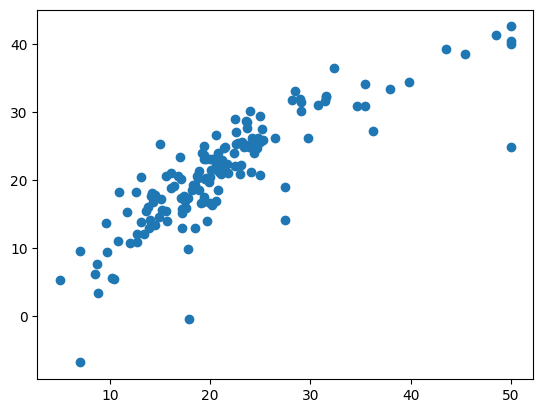

In [30]:
## plot a scstter for the prediction
plt.scatter(y_test, y_pred)

In [31]:
## Residuls
residuals = y_test - y_pred
residuals

173    -5.032525
274    -4.086021
491    -1.818933
72     -2.593196
452    -2.755427
         ...    
441    -0.301415
23      1.123598
225    10.053915
433    -2.382093
447    -5.687081
Name: MEDV, Length: 152, dtype: float64

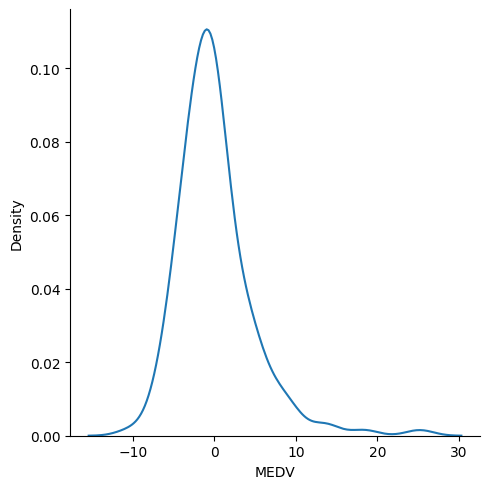

In [32]:
## plot this residuls
sns.displot(residuals, kind= 'kde')

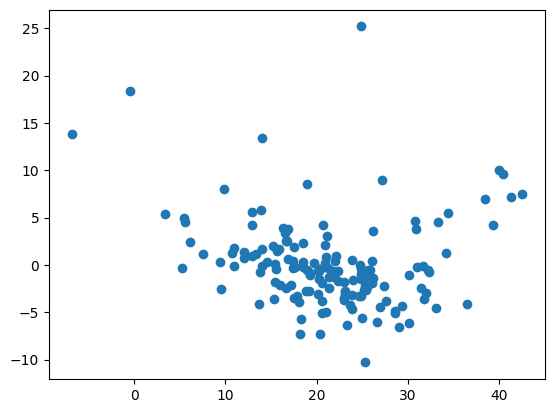

In [33]:
## scatter plot with respect to prediction and residuls
## uniform distribution
plt.scatter(y_pred, residuals)

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))


3.1739886727549274
21.598288672541994


In [35]:
## R square and adjusted R square
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
score


0.7101410361770553

In [36]:
1 - (1 - score) * (len(y_test) - 1)/ (len(y_test) - X_test.shape[1] - 1)

0.6828354816140243

In [37]:
X_test.shape[1]

13

# New Data Prediction

In [38]:
X_train[1].reshape(1,-1)

array([[-0.40200818, -0.50512499, -0.16208345, -0.28154625, -0.08796708,
        -0.20979793,  0.13394078, -0.48787608, -0.39846419,  0.15008778,
        -0.21208981,  0.3870674 , -0.05366252]])

In [39]:
scaler.transform(X_train[0].reshape(1,-1))

/opt/anaconda3/envs/hvenv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ -0.4677396 ,  -0.52749891,  -1.79325642,  -1.36081455,
        -12.07564425,  -8.61265461,  -2.50360739,  -1.26434844,
         -1.18037974,  -2.4545243 ,  -8.02745672,  -4.13937047,
         -1.89183113]])

In [40]:
model.predict(scaler.transform(X_train[0].reshape(1,-1)))

/opt/anaconda3/envs/hvenv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([43.19986033])

## pickling the model file for deployment

In [41]:
import pickle


pickle.dump(model, open('regmodel.pkl', 'wb'))

In [42]:
pickle_model = pickle.load(open('regmodel.pkl', 'rb'))

In [43]:
pickle_model.predict(scaler.transform(X_train[0].reshape(1,-1)))

/opt/anaconda3/envs/hvenv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([43.19986033])

In [46]:
scaler.transform(X_train[0].reshape(1,-1))

/opt/anaconda3/envs/hvenv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ -0.4677396 ,  -0.52749891,  -1.79325642,  -1.36081455,
        -12.07564425,  -8.61265461,  -2.50360739,  -1.26434844,
         -1.18037974,  -2.4545243 ,  -8.02745672,  -4.13937047,
         -1.89183113]])